In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
from sklearn.model_selection import train_test_split
import pickle
import math
import seaborn
import matplotlib.pyplot as plt
import joblib

In [3]:
def cleanUp(df):
    df.drop(columns=["Team_abbrev", "Opponent_abbrev", "vis_team", "home_team", "Roof", "Surface"], inplace = True)

    df.drop(columns=["Vegas_Favorite", "total_ret_td", "offensive_fumble_recovery_td"], inplace=True)

    df.drop(columns=["game_date"], inplace=True)

    df.drop(columns=["Vegas_Line", "Over_Under"], inplace=True)

In [4]:
def normalize_data(df):
    df = (df - df.mean())/df.std()
    df.dropna(axis=1, how='all', inplace=True)
    return df

In [5]:
def split_data(df, string):
    Y = np.asarray(df[string])
    df.drop(columns = [string], inplace = True)
    X = np.asarray(df).astype(np.float32)
    X = X.reshape(X.shape[0], -1)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=.2)
    return X,Y, Xtrain, Xtest, ytrain, ytest

In [6]:
def train(Xtrain, ytrain):
    model_forest = RandomForestRegressor()
    forest=model_forest.fit(Xtrain, ytrain)
    return forest

In [7]:
def analyze(df, string,model, Xtest, ytest):
    ypred = model.predict(Xtest)
    mn = df[string].mean()
    st = df[string].std()
    ypred  = (ypred * st) + mn
    ytest = (ytest * st) + mn
    ypred = np.around(ypred)
    ytest = np.around(ytest)
    return ypred, ytest

In [8]:
def save_model(model, name):
    filename = 'model' + name + '.sav'
    pickle.dump(model, open(filename, 'wb'))

In [9]:
def create_models(lst):
    df_nfl_players_stats = pd.read_csv("C:/Users/carlo/Downloads/nfl_pass_rush_receive_raw_data.csv")
    df_nfl_players_stats['index']= range(1, len(df_nfl_players_stats) + 1)
    current_stadistic = lst
    cleanUp(df_nfl_players_stats)
    norm = normalize_data(df_nfl_players_stats)
    X,Y, Xtrain, Xtest, ytrain, ytest = split_data(norm, current_stadistic)
    model = train(Xtrain, ytrain)
    ypred, ytest = analyze(df_nfl_players_stats, current_stadistic, model, Xtest, ytest)
    save_model(model, current_stadistic) 

In [56]:
df_nfl_players_stats = pd.read_csv("../Data/nfl_pass_rush_receive_raw_data.csv")

C:\Users\carlo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
df_nfl_players_stats.reset_index(inplace=True)

In [61]:
df_nfl_players_stats = pd.read_csv("../Data/nfl_pass_rush_receive_raw_data.csv")
#df_nfl_players_stats['index']= range(1, len(df_nfl_players_stats) + 1)
cleanUp(df_nfl_players_stats)
norm = normalize_data(df_nfl_players_stats)

In [13]:
overall = df_nfl_players_stats.groupby(["player_id"]).mean()
overall.reset_index(inplace=True)

In [14]:
overall

,player_id,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,...,rec_drops,offense,off_pct,vis_score,home_score,OT,Temperature,Humidity,Wind_Speed,index
0,AbduAm00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00000,0.00,0.000000,...,0.050847,11.932203,18.457627,22.610169,24.254237,0.118644,67.016949,50.677966,3.525424,13002.508475
1,AdamDa01,0.00,0.000000,0.00,0.00,0.00,0.015625,0.15625,0.00,0.000000,...,0.328125,57.562500,88.093750,21.593750,26.171875,0.093750,56.296875,58.031250,6.718750,13937.296875
2,AdamJo03,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00000,0.00,0.000000,...,0.000000,9.666667,16.111111,19.555556,23.333333,0.000000,50.555556,62.333333,8.333333,8706.000000
3,AdamRo01,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00000,0.00,0.000000,...,1.000000,10.000000,13.000000,33.000000,22.000000,0.000000,34.000000,80.000000,8.000000,17481.000000
4,AghoNe00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00000,0.00,0.000000,...,0.220339,45.016949,68.152542,22.644068,25.101695,0.050847,63.322034,51.067797,5.271186,13674.169492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,ZappBa00,16.25,23.000000,195.25,1.25,0.75,1.500000,10.00000,36.25,98.300000,...,0.000000,51.750000,84.750000,23.750000,21.250000,0.250000,72.000000,45.000000,0.000000,21894.750000
1152,ZennZa00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00000,0.00,0.000000,...,0.333333,9.000000,16.666667,24.333333,27.000000,0.000000,66.000000,58.000000,2.000000,2627.333333
1153,ZubeIs00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00000,0.00,0.000000,...,0.000000,6.500000,9.750000,17.250000,24.500000,0.000000,61.250000,63.000000,11.500000,8142.750000
1154,ZylsBr00,0.00,0.029412,0.00,0.00,0.00,0.000000,0.00000,0.00,1.164706,...,0.000000,15.470588,23.029412,23.058824,25.205882,0.029412,66.235294,57.588235,5.882353,10904.058824


In [15]:
weekly = df_nfl_players_stats.groupby(["player_id"]).last()

In [16]:
weekly

,game_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,rec_drops,offense,off_pct,vis_score,home_score,OT,Temperature,Humidity,Wind_Speed,index
player_id,,,,,,,,,,,,,,,,,,,,,
AbduAm00,202301070rai,RB,Ameer Abdullah,LVR,0,0,0,0,0,0,...,0,18,26,31,13,False,72,45,0,26244
AdamDa01,202301070rai,WR,Davante Adams,LVR,0,0,0,0,0,0,...,1,63,90,31,13,False,72,45,0,26239
AdamJo03,202101030nwe,RB,Josh Adams,NYJ,0,0,0,0,0,0,...,0,24,38,14,28,False,33,75,5,12529
AdamRo01,202112050chi,WR,Rodney Adams,CHI,0,0,0,0,0,0,...,1,10,13,33,22,False,34,80,8,17481
AghoNe00,202301080buf,WR,Nelson Agholor,NWE,0,0,0,0,0,0,...,0,4,6,23,35,False,30,74,6,26289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZappBa00,202210240nwe,QB,Bailey Zappe,NWE,14,22,185,1,2,1,...,0,34,65,33,14,False,72,45,0,22578
ZennZa00,201910310crd,RB,Zach Zenner,ARI,0,0,0,0,0,0,...,0,1,2,28,25,False,72,45,0,2873
ZubeIs00,202011010buf,WR,Isaiah Zuber,NWE,0,0,0,0,0,0,...,0,6,9,21,24,False,41,87,17,8971


In [17]:
weekly.reset_index(inplace=True)

In [18]:
weekly

,player_id,game_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,rec_drops,offense,off_pct,vis_score,home_score,OT,Temperature,Humidity,Wind_Speed,index
0,AbduAm00,202301070rai,RB,Ameer Abdullah,LVR,0,0,0,0,0,...,0,18,26,31,13,False,72,45,0,26244
1,AdamDa01,202301070rai,WR,Davante Adams,LVR,0,0,0,0,0,...,1,63,90,31,13,False,72,45,0,26239
2,AdamJo03,202101030nwe,RB,Josh Adams,NYJ,0,0,0,0,0,...,0,24,38,14,28,False,33,75,5,12529
3,AdamRo01,202112050chi,WR,Rodney Adams,CHI,0,0,0,0,0,...,1,10,13,33,22,False,34,80,8,17481
4,AghoNe00,202301080buf,WR,Nelson Agholor,NWE,0,0,0,0,0,...,0,4,6,23,35,False,30,74,6,26289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,ZappBa00,202210240nwe,QB,Bailey Zappe,NWE,14,22,185,1,2,...,0,34,65,33,14,False,72,45,0,22578
1152,ZennZa00,201910310crd,RB,Zach Zenner,ARI,0,0,0,0,0,...,0,1,2,28,25,False,72,45,0,2873
1153,ZubeIs00,202011010buf,WR,Isaiah Zuber,NWE,0,0,0,0,0,...,0,6,9,21,24,False,41,87,17,8971
1154,ZylsBr00,202201090tam,WR,Brandon Zylstra,CAR,0,1,0,0,0,...,0,50,69,17,41,False,80,99,4,19650


In [19]:
current_stadistic = "pass_att"
weekly['index']= range(1, len(weekly) + 1)
norm = normalize_data(weekly)
X,Y, Xtrain, Xtest, ytrain, ytest = split_data(norm, current_stadistic)

In [20]:
stats_to_be = ["pass_att", "pass_cmp","pass_yds", "pass_td","rush_td", "rush_att", "rush_yds", "targets", "rec", "rec_td", "rec_yds"]

In [21]:
len(stats_to_be)

11

In [22]:
weekly['index']= range(1, len(weekly) + 1)
copy_to_store = weekly.copy()

In [23]:
count=0
for i in stats_to_be:
    current_stadistic = i
    norm = normalize_data(weekly)
    X,Y, Xtrain, Xtest, ytrain, ytest = split_data(norm, current_stadistic)
    filename = filename = "model" + i + ".sav"
    loaded_model = joblib.load(filename)
    ypred = loaded_model.predict(X)
    mn = weekly["index"].mean()
    st = weekly["index"].std()
    mn_Y = weekly[i].mean()
    st_Y = weekly[i].std()

    index_norm = [round((i[16] * st) + mn) for i in X]
    pred = [round((i * st_Y) + mn_Y) for i in ypred]
    
    pred = [0 if i< 0 else i for i in pred]
    
    prediction_name = i + "_weekly"
    
    d = {"index": index_norm, prediction_name: pred}
    
    predictions_df = pd.DataFrame(d)
    if (count==0):
        count+=1
        merged_df = pd.merge(copy_to_store, predictions_df, on='index')
    else:
        count+=1
        merged_df = pd.merge(merged_df, predictions_df, on='index')

In [24]:
copy_to_store

,player_id,game_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,rec_drops,offense,off_pct,vis_score,home_score,OT,Temperature,Humidity,Wind_Speed,index
0,AbduAm00,202301070rai,RB,Ameer Abdullah,LVR,0,0,0,0,0,...,0,18,26,31,13,False,72,45,0,1
1,AdamDa01,202301070rai,WR,Davante Adams,LVR,0,0,0,0,0,...,1,63,90,31,13,False,72,45,0,2
2,AdamJo03,202101030nwe,RB,Josh Adams,NYJ,0,0,0,0,0,...,0,24,38,14,28,False,33,75,5,3
3,AdamRo01,202112050chi,WR,Rodney Adams,CHI,0,0,0,0,0,...,1,10,13,33,22,False,34,80,8,4
4,AghoNe00,202301080buf,WR,Nelson Agholor,NWE,0,0,0,0,0,...,0,4,6,23,35,False,30,74,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,ZappBa00,202210240nwe,QB,Bailey Zappe,NWE,14,22,185,1,2,...,0,34,65,33,14,False,72,45,0,1152
1152,ZennZa00,201910310crd,RB,Zach Zenner,ARI,0,0,0,0,0,...,0,1,2,28,25,False,72,45,0,1153
1153,ZubeIs00,202011010buf,WR,Isaiah Zuber,NWE,0,0,0,0,0,...,0,6,9,21,24,False,41,87,17,1154
1154,ZylsBr00,202201090tam,WR,Brandon Zylstra,CAR,0,1,0,0,0,...,0,50,69,17,41,False,80,99,4,1155


In [25]:
merged_df.to_csv("weekly_predictions.csv")

In [26]:
overall['index']= range(1, len(overall) + 1)
copy_to_store = overall.copy()

In [27]:
count = 0
for i in stats_to_be:
    current_stadistic = i
    norm = normalize_data(overall)
    X,Y, Xtrain, Xtest, ytrain, ytest = split_data(norm, current_stadistic)
    filename = "model" + i + ".sav"
    loaded_model = joblib.load(filename)
    ypred = loaded_model.predict(X)
    mn = overall["index"].mean()
    st = overall["index"].std()
    mn_Y = overall[i].mean()
    st_Y = overall[i].std()

    index_norm = [round((i[16] * st) + mn) for i in X]
    pred = [round((i * st_Y) + mn_Y) for i in ypred]
    
    pred = [0 if i< 0 else i for i in pred]
    
    prediction_name = i + "_total"
    
    d = {"index": index_norm, prediction_name: pred}
    
    predictions_df = pd.DataFrame(d)
    if (count==0):
        count+=1
        merged_df = pd.merge(copy_to_store, predictions_df, on='index')
    else:
        count+=1
        merged_df = pd.merge(merged_df, predictions_df, on='index')

In [28]:
merged_df.columns.get_loc("index")

53

In [29]:
all_pred_table = merged_df.drop(merged_df.iloc[:, 1:54],axis = 1)

In [30]:
all_pred_table

,player_id,pass_att_total,pass_cmp_total,pass_yds_total,pass_td_total,rush_td_total,rush_att_total,rush_yds_total,targets_total,rec_total,rec_td_total,rec_yds_total
0,AbduAm00,0,0,0,0,0,2,6,2,2,0,10
1,AdamDa01,0,0,0,0,0,0,0,9,7,1,92
2,AdamJo03,0,0,0,0,0,4,19,1,1,0,3
3,AdamRo01,0,0,0,0,0,0,0,1,1,0,0
4,AghoNe00,0,0,0,0,0,0,0,4,2,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...
1151,ZappBa00,23,15,243,1,0,2,0,1,1,0,0
1152,ZennZa00,0,0,0,0,0,1,0,2,1,0,6
1153,ZubeIs00,0,0,0,0,0,1,5,1,1,0,7
1154,ZylsBr00,0,0,0,0,0,0,0,1,1,0,7


In [31]:
#merged_df.to_csv("overall_predictions.csv")

In [32]:
#all_pred_table.to_csv("predictions_table.csv")

In [33]:
filename

'modelrec_yds.sav'

In [34]:
filename = "modelpass_att.sav"
loaded_model = joblib.load(filename)

In [35]:
ypred = loaded_model.predict(X)

In [36]:
ypred

array([-0.29556187, -0.24328274, -0.29556187, ..., -0.29556187,
       -0.29556187, -0.29556187])

In [37]:
mn = weekly["index"].mean()
st = weekly["index"].std()
print(mn)
mn_Y = weekly["pass_att"].mean()
st_Y = weekly["pass_att"].std()

print(mn_Y)
index_norm = [round((i[16] * st) + mn) for i in X]
pred = [round((i * st_Y) + mn_Y) for i in ypred]

578.5
2.0060553633217992


In [38]:
ypred.shape

(1156,)

In [39]:
d = {"index": index_norm, "Predictions": ypred, "Actual": ytest, "Y":pred}

In [40]:
predictions_df = pd.DataFrame(d)

ValueError: arrays must all be same length

In [ ]:
predictions_df

In [ ]:
merged_df = pd.merge(weekly, predictions_df, on='index')

In [ ]:
merged_df

In [ ]:
for 
mn = weekly["index"].mean()
st = weekly["string"].std()
index_norm  = (ypred * st) + mn


In [ ]:
cnf_matrix = confusion_matrix(ytest,ypred)
print(cnf_matrix)
print(classification_report(ytest,ypred))

In [ ]:
import matplotlib.pyplot as plt

In [41]:
stats_to_be = ["pass_att", "pass_cmp","pass_yds", "pass_td","rush_td", "rush_att", "rush_yds", "targets", "rec", "rec_td", "rec_yds"]

In [64]:
index = list(df_nfl_players_stats)
del index[:5]

In [65]:
index

['pass_cmp',
 'pass_att',
 'pass_yds',
 'pass_td',
 'pass_int',
 'pass_sacked',
 'pass_sacked_yds',
 'pass_long',
 'pass_rating',
 'rush_att',
 'rush_yds',
 'rush_td',
 'rush_long',
 'targets',
 'rec',
 'rec_yds',
 'rec_td',
 'rec_long',
 'fumbles_lost',
 'rush_scrambles',
 'designed_rush_att',
 'comb_pass_rush_play',
 'comb_pass_play',
 'comb_rush_play',
 'two_point_conv',
 'pass_yds_bonus',
 'rush_yds_bonus',
 'rec_yds_bonus',
 'Total_DKP',
 'Off_DKP',
 'Total_FDP',
 'Off_FDP',
 'Total_SDP',
 'Off_SDP',
 'pass_target_yds',
 'pass_poor_throws',
 'pass_blitzed',
 'pass_hurried',
 'rush_yds_before_contact',
 'rush_yac',
 'rush_broken_tackles',
 'rec_air_yds',
 'rec_yac',
 'rec_drops',
 'offense',
 'off_pct',
 'vis_score',
 'home_score',
 'OT',
 'Temperature',
 'Humidity',
 'Wind_Speed']

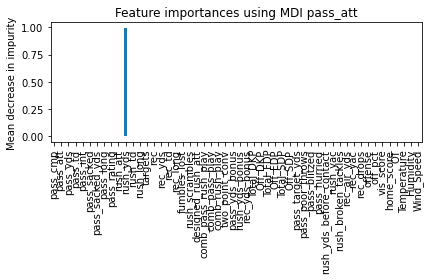

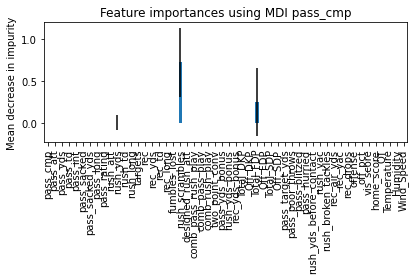

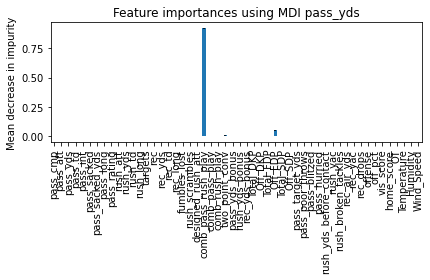

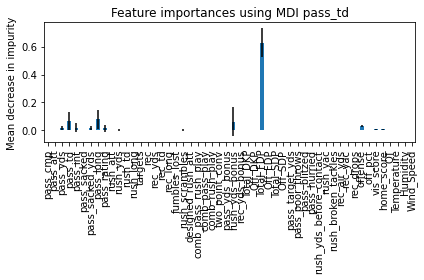

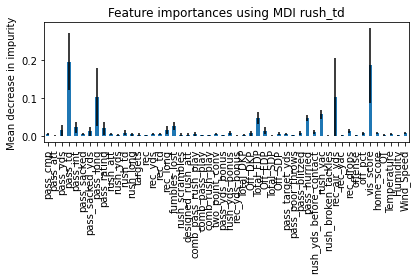

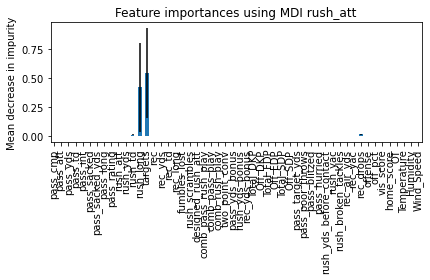

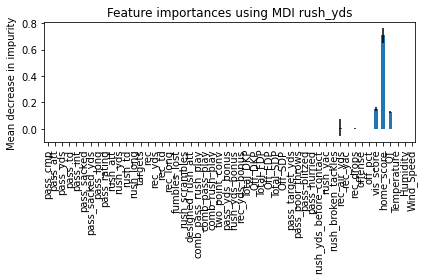

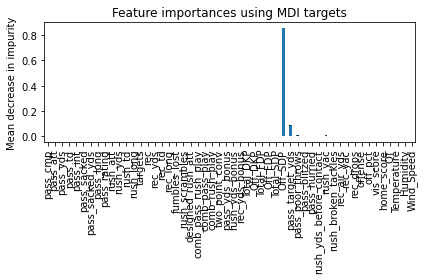

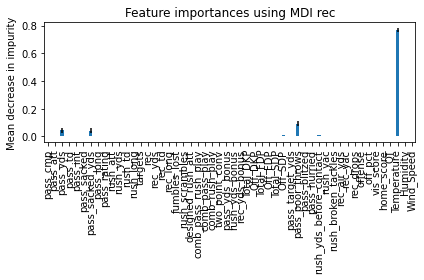

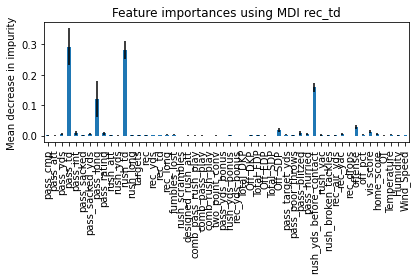

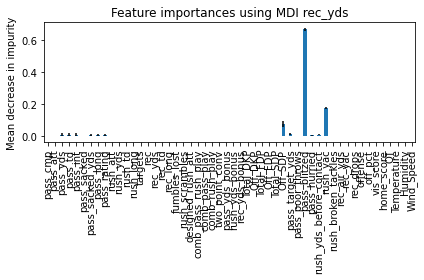

In [70]:
for i in stats_to_be: 
    filename = "model" + i + ".sav"
    loaded_model = joblib.load(filename)
    importances = loaded_model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in loaded_model.estimators_], axis=0)

    forest_importances = pd.Series(importances, index=index)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI "+ i)
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()